<a href="https://colab.research.google.com/github/Nakulpradeep94/-ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading dataset
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant reviews.csv')

In [4]:
# to go through first 5 index of dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#last 5 records of the dataset
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
#to find number of rows and columns
df1.shape

(105, 6)

In [7]:
#To find data types of columns from the given data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Note that even the cost feature is an object

In [ ]:
#converting cost column to integer type
df1['Cost']=df1['Cost'].str.replace(",","").astype(int)

In [ ]:
# To get the descriptive statistics of the data
df1.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


The mean cost of food for the restaurants in zomato is 861.42 rupees 

In [8]:
df1.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


Most Common timing of restaurants in zomato are from 11 AM to 11PM

Initially we will only be doing the data checks on the first dataset as clustering is only needed to be done on that dataset alone.So merging will be done later

# **Handling Null Values**

In [ ]:
#to check the number of  null values in the dataset
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

so there are 54 null values in collection and 1 null value in timings


In [ ]:
# Filling all missing values  in collection
df1['Collections'].fillna('Not Rated',inplace=True)

we have successfully removed all null values in collection column.Now only timing column is left which we can drop as a feature

In [ ]:
#checking for duplicate values in the first dataset
df1.duplicated().sum()

0

**Removing unecessary columns**

In [ ]:
#Removing unnecessary columns
df1.drop(['Links','Timings'],axis=1,inplace=True)

Now checking for null values after droping  timing feature

In [ ]:
#null value checks after dropping column
df1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

so there is no more null values

# **Exploratory data Analysis**

**Top 10 expensive restaurants**

Text(0.5, 1.0, 'Top 10 expensive restaurants')

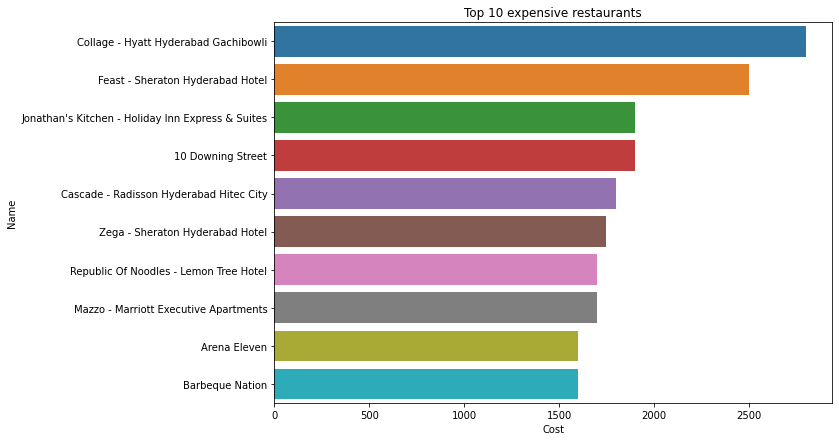

In [ ]:
#Visualisation for top 10 expensive olumns
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=False)[:10])
plt.title("Top 10 expensive restaurants")


**Top 10 cheapest restaurants**

Text(0.5, 1.0, 'Top 10 cheapest restaurants')

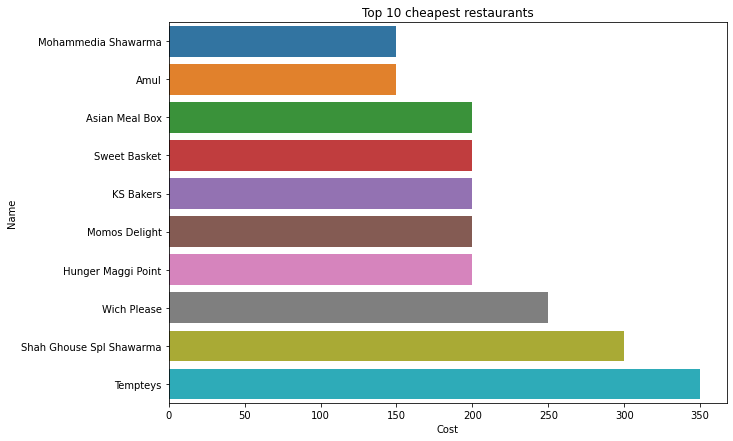

In [ ]:
#Visualisation for cheapest 10 restaurants
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=True)[:10])
plt.title("Top 10 cheapest restaurants")

**Exploration of cuisine column**

In [ ]:
#cuisine column splitting
cuisine=df1['Cuisines'].str.split(', ''')
#To extract all cuisines from each of the rows
cuisine_list=[]
for elem in cuisine:
  for subelem in elem:
   cuisine_list.append(subelem)
cuisine_series = pd.Series(cuisine_list)

In [ ]:
# Creating DataFrame of Cuisines and their Counts.
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts(ascending=False).reset_index()
cuisine_df.rename(columns={0:'Count'},inplace=True)
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


**Most served cuisine**

Text(0.5, 1.0, 'Most popular cuisines')

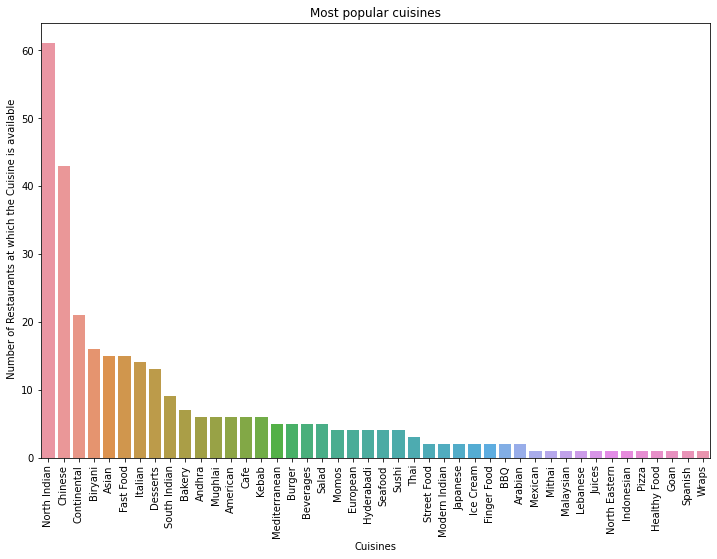

In [ ]:
# plot of most served Cuisine in Restaurants
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel(' Number of Restaurants at which the Cuisine is available')
plt.title('Most popular cuisines')

**Number of cuisines offered by each restaurant**

In [ ]:
#creating column to display the number of cuisines offered by a particular restaurant
df1['num_cuisines_offered'] = df1.Cuisines.apply(lambda x: len((x.split(','))))
df1[['Cuisines', 'num_cuisines_offered']]

,Cuisines,num_cuisines_offered
0,"Chinese, Continental, Kebab, European, South I...",6
1,"Biryani, North Indian, Chinese",3
2,"Asian, Mediterranean, North Indian, Desserts",4
3,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,"Asian, Continental, North Indian, Chinese, Med...",5
...,...,...
100,"Fast Food, Salad",2
101,"Bakery, Mithai",2
102,"North Indian, Biryani, Chinese",3
103,Fast Food,1


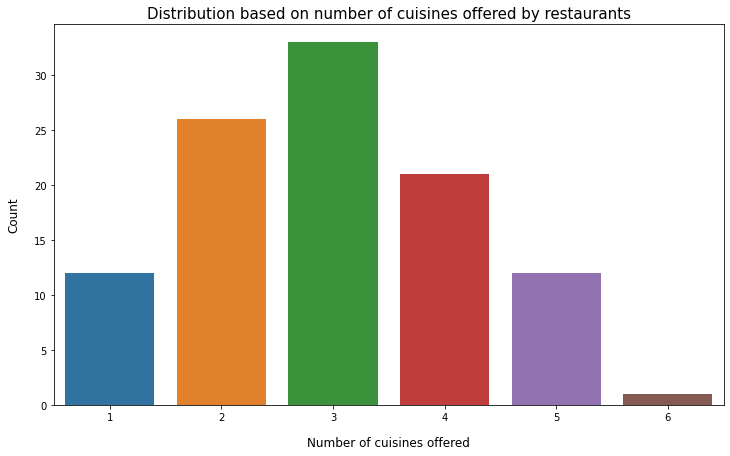

In [ ]:
#setting figure size
plt.figure(figsize=(12, 7))

#count plot to display distribution based on number of cuisines offered by restaurants
sns.countplot(data = df1, x = 'num_cuisines_offered')

#To display the x label, y label and title of the bar chart
plt.xlabel("Number of cuisines offered", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Distribution based on number of cuisines offered by restaurants", fontsize = 15)
plt.xticks(rotation=360)
plt.show()

# **Zomato Review data**

In [ ]:
# to go through first 5 index of dataset
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# to go through last 5 index of dataset
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [ ]:
#to get the number of columns and rows in the given dataset
review_df.shape

(10000, 7)

In [ ]:
# to find data types of columns from the given data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**Handling null values**

In [ ]:
#to check the number of  null values in the dataset
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#Checking if there are any null values in the dataframe
review_df.isnull().sum().sum()

197

The total null values in the review dataset is 197

In [ ]:
#To get percentage of null values in each dataset
(review_df.isnull().sum()*100)/len(review_df)

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

The percent of null values is less than 0.5 percent for our data .so we could drop them

In [ ]:
#Creating a new copy
review_new_df=review_df.copy()

In [ ]:
#dropping null values from dataset
review_new_df.dropna(inplace=True)

In [ ]:
# ReChecking if there are any null values in the dataframe
review_new_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

No more null values in the dataset

In [ ]:
# checking for duplicate values in dataset
review_new_df.duplicated().sum()

0

So no duplicate values in the dataset

In [ ]:
# to find number of unique values in each column of dataset
review_new_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

So the number of unique retaurants is same as that of the cluster dataset

In [ ]:
# to get the value counts in rating column
review_new_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We can see that there is a like option present in the review_new_df. So  need to change it

In [ ]:
# changing non float value to float
review_new_df['Rating'] = review_new_df['Rating'].replace('Like','5').astype('float')

In [ ]:
#checking value counts in picture column
review_new_df['Pictures'].unique()

array([ 0,  8,  1,  7,  2,  6,  3,  5,  9,  4, 16, 26, 10, 15, 22, 11, 14,
       13, 21, 52, 18, 20, 27, 19, 12, 41, 42, 37, 28, 17, 25, 24, 34, 64,
       23, 32])

**Descriptive statistics**

In [ ]:
# descriptive summary of all columns 
review_new_df.describe()

,Rating,Pictures
count,9955.000000,9955.000000
mean,3.600402,0.751984
std,1.483565,2.575691
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000



*   Average rating of the reataurants in zomato is 3.6, while median rating is  4 implying our rating column is negatively skewed.


*   Maximum pictures uploaded by a person is 64.
*   More than 75 percentile of people donot upload pictures.







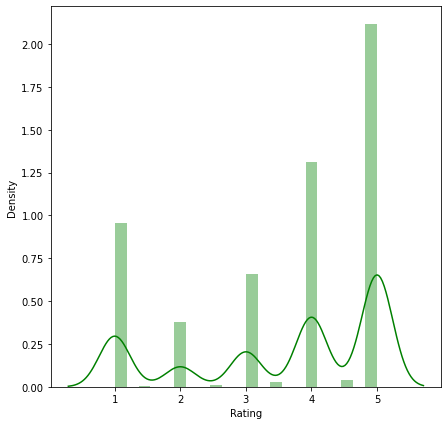

In [ ]:
#Distribution plot of rating
plt.figure(figsize=(7,7))
sns.distplot(review_new_df['Rating'],color="g")

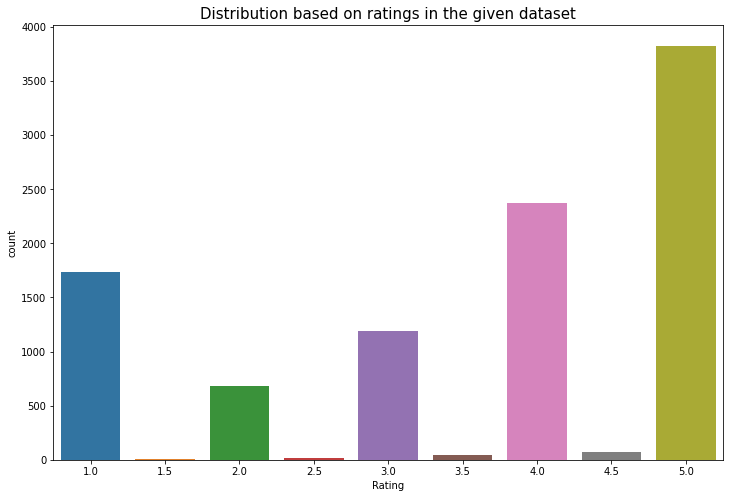

In [ ]:
#Count plot of rating
plt.title("Distribution based on ratings in the given dataset", fontsize = 15)
sns.countplot(review_new_df['Rating'])

In [ ]:
#checking skewness of rating column
review_new_df['Rating'].skew()

-0.7073218560014441

In [ ]:
#Creating new columns from metadata
review_new_df['num_of_review']=review_new_df['Metadata'].apply(lambda x: x.split(' ')[0]).astype('float')
review_new_df['num_of_followers']=review_new_df['Metadata'].apply(lambda x: x.split(' ')[3] if len(x.split(' '))>2 else  0).astype('float')


In [ ]:
#data type checking after transformation
review_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant        9955 non-null   object 
 1   Reviewer          9955 non-null   object 
 2   Review            9955 non-null   object 
 3   Rating            9955 non-null   float64
 4   Metadata          9955 non-null   object 
 5   Time              9955 non-null   object 
 6   Pictures          9955 non-null   int64  
 7   num_of_review     9955 non-null   float64
 8   num_of_followers  9955 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.0+ MB


**Top 10 reviewers on average**

In [ ]:
#grouping together reviewer and metadata as some of the reviewers have same name
eda_8=review_new_df.groupby(['Reviewer','Metadata']).agg({'Reviewer':'count','num_of_followers':'mean'}).rename(columns={'Reviewer':'no.of reviews'}).reset_index().sort_values(by='no.of reviews',ascending=False)

eda_8.head(10)

,Reviewer,Metadata,no.of reviews,num_of_followers
4077,Parijat Ray,"146 Reviews , 333 Followers",13,333.0
2458,Jay Mehta,"46 Reviews , 43 Followers",11,43.0
7439,Vedant Killa,"86 Reviews , 216 Followers",11,216.0
3325,Manojkumar D Nambisan,"29 Reviews , 11 Followers",10,11.0
279,Age Of Foodies (Suraj Karambe),"104 Reviews , 334 Followers",10,334.0
6327,Siva Kumar,"84 Reviews , 183 Followers",10,183.0
2803,Khushboo Pandey,"59 Reviews , 42 Followers",9,42.0
3912,Nillu,"17 Reviews , 9 Followers",9,9.0
4229,Prachita Jayaswal,"104 Reviews , 531 Followers",9,531.0
826,Anusha Sinha,"42 Reviews , 49 Followers",9,49.0


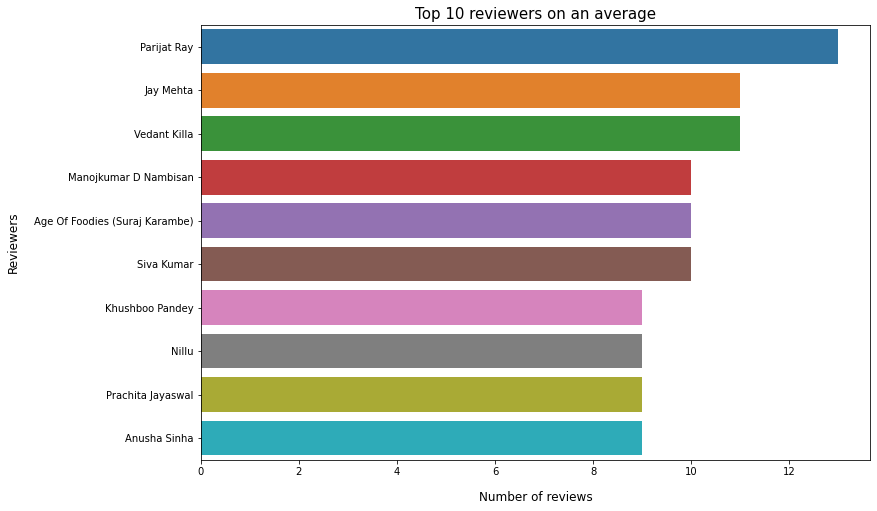

In [ ]:
#Bar plot to display top 10 reviewers
sns.barplot(y = eda_8.head(10)['Reviewer'], 
            x = eda_8.head(10)['no.of reviews'])

#To display the x label, y label and title of the bar chart
plt.xlabel("Number of reviews", labelpad=14, fontsize = 12)
plt.ylabel("Reviewers", labelpad=14, fontsize = 12)
plt.title("Top 10 reviewers on an average", fontsize = 15)
plt.show()

**Top 10 reviewers based on number of followers**

In [ ]:
#to get dataframe ordered according to number of followers
follower_eda=eda_8.sort_values(by='num_of_followers',ascending=False)
follower_eda.head()

,Reviewer,Metadata,no.of reviews,num_of_followers
5811,Satwinder Singh,"186 Reviews , 13410 Followers",3,13410.0
1816,Eat_vth_me,"60 Reviews , 13320 Followers",1,13320.0
5559,Samar Sardar,"8 Reviews , 11329 Followers",2,11329.0
1905,Foodies Hyderabad,"31 Reviews , 9494 Followers",4,9494.0
6615,Srinivas,"34 Reviews , 7628 Followers",4,7628.0


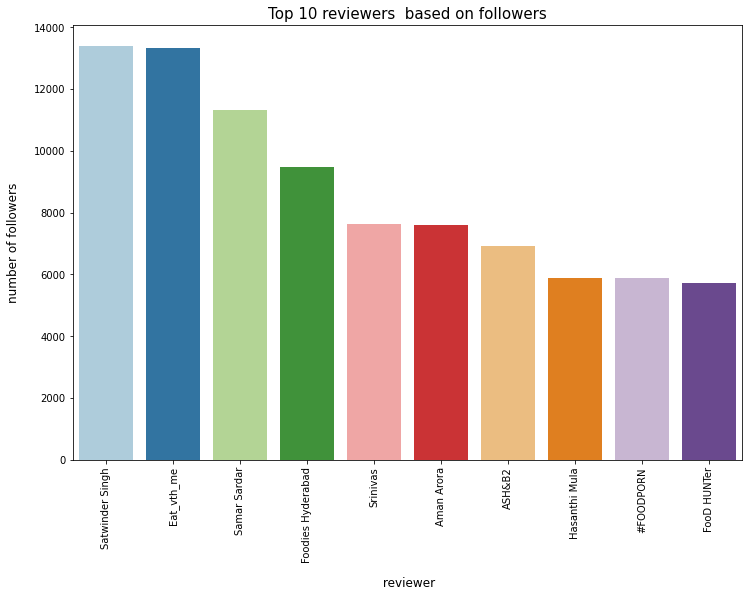

In [ ]:
#Visualisation plot of top 10 reviewers based on followers
sns.barplot(x= follower_eda.head(10)['Reviewer'], 
            y = follower_eda.head(10)['num_of_followers'], palette = 'Paired')

#To display the x label, y label and title of the bar chart
plt.xlabel(" reviewer", labelpad=14, fontsize = 12)
plt.ylabel("number of followers", labelpad=14, fontsize = 12)
plt.title("Top 10 reviewers  based on followers", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#To show why grouping of metadata and name is important as some reviewer has same names
review_new_df[review_new_df['Reviewer']=='Ankita']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,num_of_review,num_of_followers
858,Hyper Local,Ankita,We liked the chhole bhature as it was not at a...,4.0,"10 Reviews , 8 Followers",4/7/2019 17:29,0,10.0,8.0
1278,Absolute Sizzlers,Ankita,A Friday outing in Absolute Sizzlers. Quite po...,4.0,"76 Reviews , 211 Followers",3/13/2019 13:22,5,76.0,211.0
1362,The Lal Street - Bar Exchange,Ankita,A good place to hangout. They have indoor as w...,4.0,"10 Reviews , 8 Followers",4/7/2019 17:31,0,10.0,8.0
2194,Jonathan's Kitchen - Holiday Inn Express & Suites,Ankita,A quick dinner for last Sunday of 2018 landed ...,4.0,"76 Reviews , 211 Followers",1/2/2019 17:20,1,76.0,211.0
2484,SKYHY,Ankita,"So beautiful, great DJ nights, economic, great...",5.0,"10 Reviews , 179 Followers",10/2/2018 14:10,0,10.0,179.0
3641,Banana Leaf Multicuisine Restaurant,Ankita,Buffet system is so cool. Just loved the food....,5.0,"10 Reviews , 179 Followers",10/2/2018 14:03,0,10.0,179.0
3706,Kritunga Restaurant,Ankita,We had picked up Sambar rice to satiate the cr...,3.0,"76 Reviews , 211 Followers",4/15/2019 12:28,0,76.0,211.0
4315,The Foodie Monster Kitchen,Ankita,"Located near DLF, IIIT - This small place is m...",4.0,"76 Reviews , 211 Followers",2/8/2019 10:55,1,76.0,211.0
4612,Ulavacharu,Ankita,Undoubtedly pocket friendly place.\nWe had chi...,4.0,"76 Reviews , 211 Followers",5/4/2019 9:21,3,76.0,211.0
4818,Udipi's Upahar,Ankita,"Good food, loved the south Indian dishes over ...",4.0,"10 Reviews , 179 Followers",10/2/2018 13:57,0,10.0,179.0


EDA on time column

In [ ]:
# lets convert Time to DateTime format and extract year, Month, Days and hours.
review_new_df['Time']=pd.to_datetime(review_new_df['Time'])
review_new_df['Year'] = pd.DatetimeIndex(review_new_df['Time']).year
review_new_df['Month'] = pd.DatetimeIndex(review_new_df['Time']).month
review_new_df['Day'] = pd.DatetimeIndex(review_new_df['Time']).day
review_new_df['Hour'] = pd.DatetimeIndex(review_new_df['Time']).hour
review_new_df['week_day'] = pd.DatetimeIndex(review_new_df['Time']).dayofweek

In [ ]:
#checking first 5 rows after transformation
review_new_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,num_of_review,num_of_followers,Year,Month,Day,Hour,week_day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019,5,25,15,5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019,5,25,14,5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2.0,3.0,2019,5,24,22,4
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1.0,1.0,2019,5,24,22,4
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3.0,2.0,2019,5,24,21,4


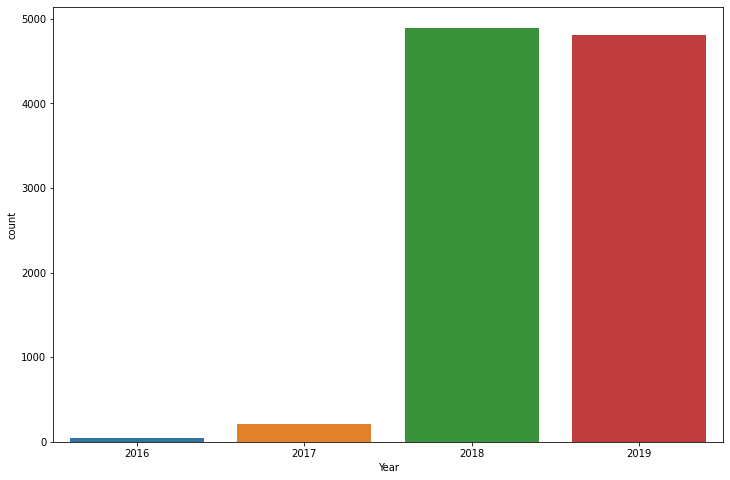

In [ ]:
#visualisation of reviews based on year
sns.countplot(review_new_df.Year)

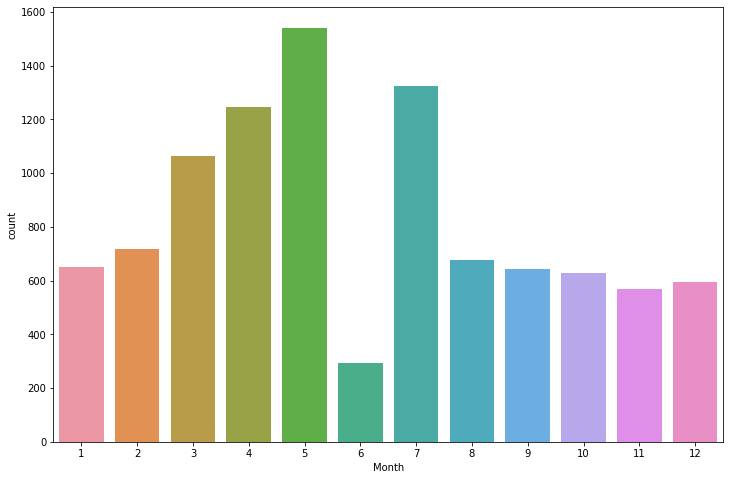

In [ ]:
#visualisation of reviews based on month
sns.countplot(review_new_df.Month)

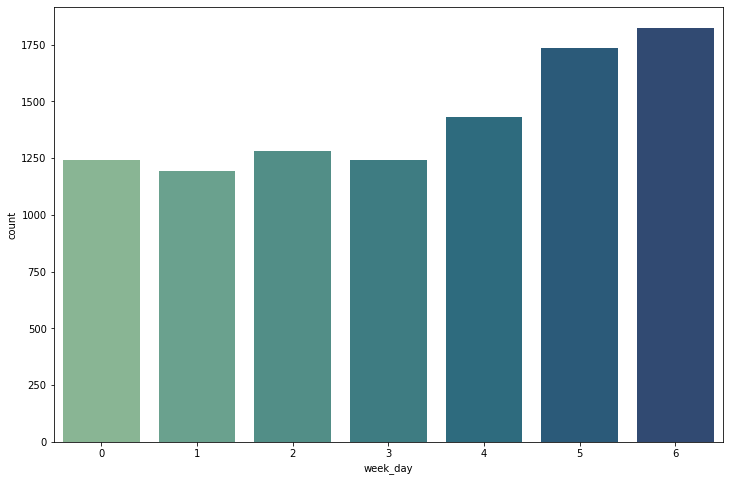

In [ ]:
#Visualisation based on week day
sns.countplot(review_new_df.week_day,palette = 'crest')

Maximum reviews are posted during weekends(ie Saturday and Sunday)

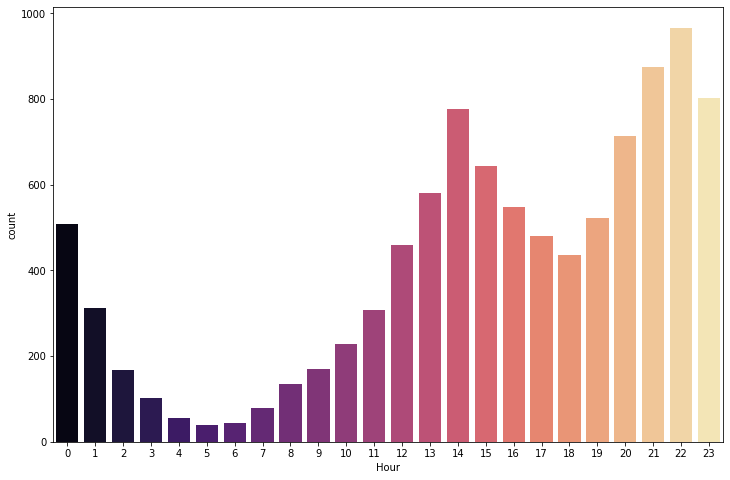

In [ ]:
#visualisation based on hour of the day
sns.countplot(review_new_df.Hour,palette = "magma")

Hour from 9 pm to 10  we have the most reviews

**Restaurant and  rating relation**

In [ ]:
rest_rate_df=review_new_df.groupby('Restaurant').agg({'Rating':'mean'}).reset_index().sort_values(by='Rating',ascending=False)
rest_rate_df.head(10)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

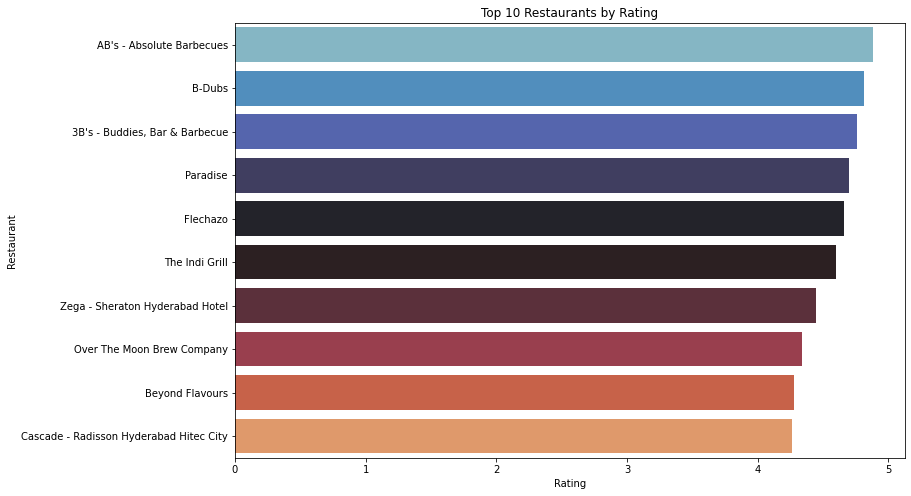

In [ ]:
#Visualisation of top 10 restaurants by mean rating
fig = plt.figure(figsize=[12,8])
sns.barplot(data=rest_rate_df[:10], x='Rating', y='Restaurant',palette ='icefire')
plt.title('Top 10 Restaurants by Rating')

The restaurant with highest average rating is AB's-Absolute barbeque with a mean rating of 4.88

# **Clustering**

In [ ]:
#to view all contents in features
pd.set_option('display.max_columns', None)

In [ ]:
#creating a copy of the dataframe
cluster_df=df1.copy()
cluster_df.head()

,Name,Cost,Collections,Cuisines,num_cuisines_offered
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5


In [ ]:
# transformation needed to one hot encode a series of values
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.replace(' ','')

cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')
s = cluster_df['Cuisines'].explode()
cluster_df=cluster_df[['Name', 'Cost','num_cuisines_offered']].join(pd.crosstab(s.index, s))
cluster_df.head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_df.iloc[:,1:])
cluster_data_sc.shape

(105, 46)

**K means clustering**

In [ ]:
from sklearn.cluster import KMeans
#within cluster sum of squares
sse_list = []

#using 'for' loop for storing wcss values in the empty list created above
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(cluster_df.iloc[:, 1:])
    sse_list.append(kmeans.inertia_)

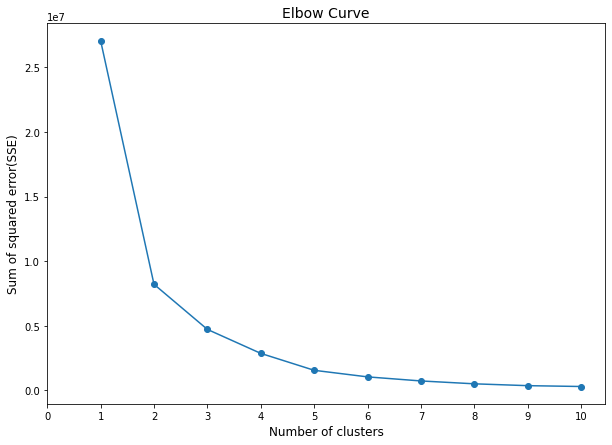

In [ ]:
#setting figure size
plt.figure(figsize=(10,7))

#Plotting elbow curve for selecting the value of k
plt.plot(range(1, 11), sse_list,marker = "o")

#To display the x label, y label, title and xticks 
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared error(SSE)', fontsize = 12)
plt.title('Elbow Curve', fontsize = 14) 
plt.xticks(ticks = list(range(0, 11)))
plt.show()

From the elbow method we could see that the  optimum number of cluster could be 4 or 5.We can use silhouette coefficient to decide between them

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_df.iloc[:, 1:])
    scores.append(metrics.silhouette_score(cluster_df.iloc[:, 1:], km.labels_))

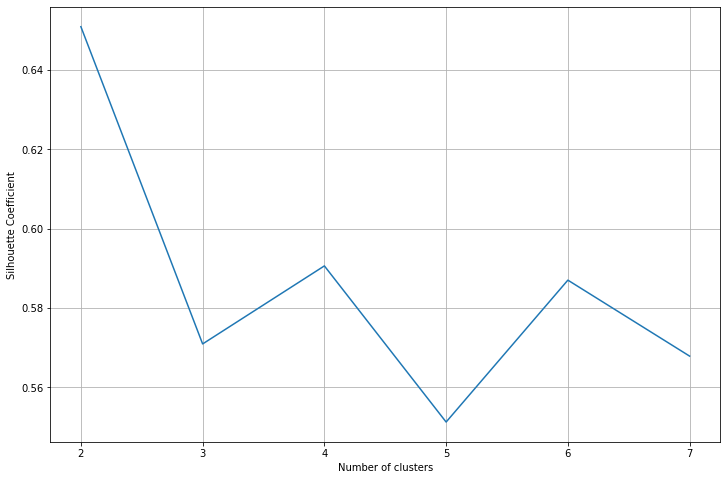

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

The silhouette score or coefficient  of 6 is better than 5 so we can take optimum number of clusters as 6.

In [ ]:
#creating base model
kmeans = KMeans(n_clusters = 6, random_state = 0)

#fitting the model to the dataset
kmeans.fit(cluster_df.iloc[:, 1:])

KMeans(n_clusters=6, random_state=0)

In [ ]:
#Predicting the closest cluster each sample in X belongs to
y_cluster = kmeans.predict(cluster_df.iloc[:, 1:])
y_cluster

array([0, 0, 5, 0, 5, 2, 1, 3, 0, 3, 3, 2, 0, 5, 2, 1, 1, 3, 2, 3, 1, 2,
       2, 3, 5, 0, 5, 5, 1, 3, 0, 0, 1, 0, 2, 1, 1, 1, 5, 1, 5, 1, 1, 1,
       0, 0, 5, 0, 1, 1, 0, 1, 1, 5, 3, 1, 4, 1, 3, 3, 5, 5, 1, 0, 1, 2,
       0, 5, 2, 2, 5, 5, 0, 1, 1, 1, 3, 1, 5, 1, 1, 1, 0, 1, 1, 3, 1, 1,
       3, 3, 2, 2, 4, 1, 1, 3, 1, 2, 3, 0, 1, 3, 1, 3, 2], dtype=int32)

In [ ]:
#unique clusters with its count
np.unique(y_cluster, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([18, 37, 14, 18,  2, 16]))

In [ ]:
# Making label column
cluster_df['labels'] = y_cluster
cluster_df.head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
0,Beyond Flavours,800,6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,Paradise,800,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
3,Shah Ghouse Hotel & Restaurant,800,5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5


In [ ]:
#Creating an array(to do the figure)
x = np.array(cluster_df)

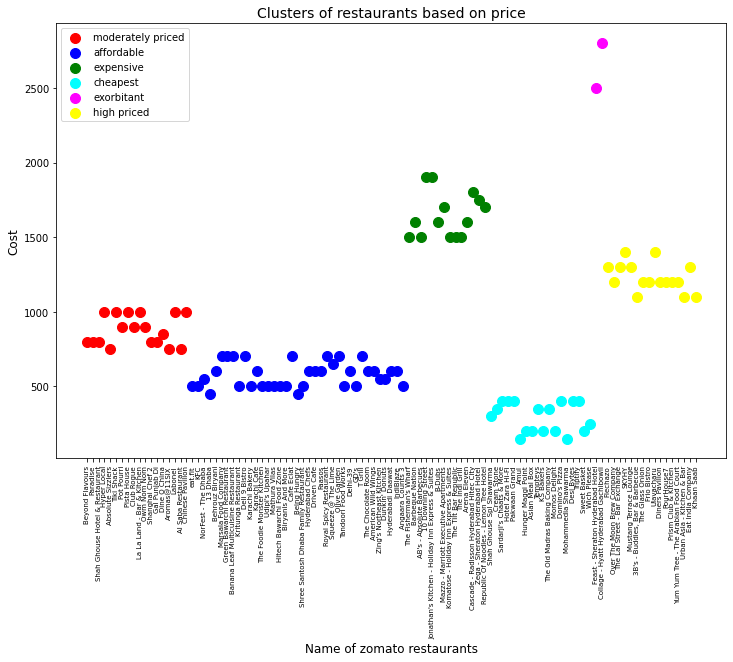

In [ ]:
#Scatter plot of 1st and second column
plt.scatter(x[y_cluster==0, 0], x[y_cluster==0, 1], s=100, c='red', label ='moderately priced')
plt.scatter(x[y_cluster==1, 0], x[y_cluster==1, 1], s=100, c='blue', label ='affordable')
plt.scatter(x[y_cluster==2, 0], x[y_cluster==2, 1], s=100, c='green', label ='expensive')
plt.scatter(x[y_cluster==3, 0], x[y_cluster==3, 1], s=100, c='cyan', label ='cheapest')
plt.scatter(x[y_cluster==4, 0], x[y_cluster==4, 1], s=100, c='magenta', label ='exorbitant')
plt.scatter(x[y_cluster==5, 0], x[y_cluster==5, 1], s=100, c='yellow', label ='high priced')
#To display the x label, y label, title and xticks 
plt.title('Clusters of restaurants based on price', fontsize = 14)
plt.xlabel('Name of zomato restaurants', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()

Observation
*   From the distribution we can see that the biggest cluster is between 400 and 700

*   The smallest cluster is having two restaurants which are heavily priced



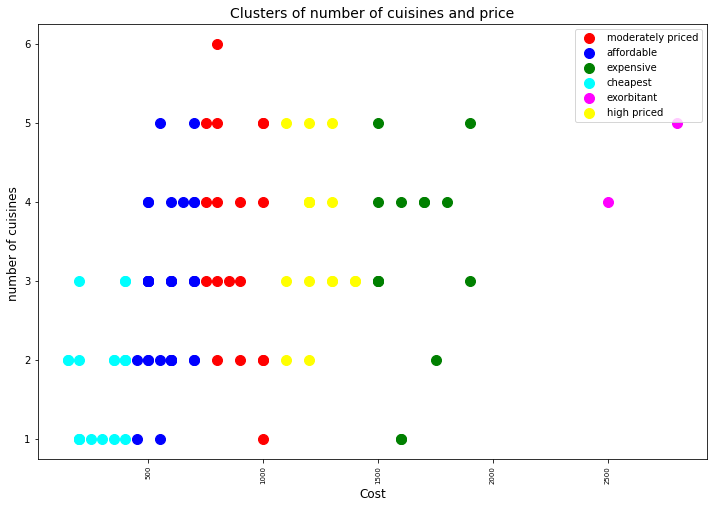

In [ ]:
#Scatter plot of first and third column ie name and no of cuisines ordered
plt.scatter(x[y_cluster==0, 1], x[y_cluster==0, 2], s=100, c='red', label ='moderately priced')
plt.scatter(x[y_cluster==1, 1], x[y_cluster==1, 2], s=100, c='blue', label ='affordable')
plt.scatter(x[y_cluster==2, 1], x[y_cluster==2, 2], s=100, c='green', label ='expensive')
plt.scatter(x[y_cluster==3, 1], x[y_cluster==3, 2], s=100, c='cyan', label ='cheapest')
plt.scatter(x[y_cluster==4, 1], x[y_cluster==4, 2], s=100, c='magenta', label ='exorbitant')
plt.scatter(x[y_cluster==5, 1], x[y_cluster==5, 2], s=100, c='yellow', label ='high priced')

#To display the x label, y label, title and xticks 
plt.title('Clusters of number of cuisines and price', fontsize = 14)
plt.xlabel('Cost', fontsize = 12)
plt.ylabel('number of cuisines ', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()



*   Cheaper restaurants have lesser number of cuisines
*   Restaurants having  4 or 5 cuisines offer larger range of prices



In [ ]:
#Cluster of exorbitant restaurants
cluster_df[y_cluster==4]

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
56,Feast - Sheraton Hyderabad Hotel,2500,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
92,Collage - Hyatt Hyderabad Gachibowli,2800,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [ ]:
#Cluster of cheapest restaurants
cluster_df[y_cluster==3].sort_values(by='Cost').head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
5,The Fisherman's Wharf,1500,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2
14,AB's - Absolute Barbecues,1500,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
65,Komatose - Holiday Inn Express & Suites,1500,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
68,The Tilt Bar Republic,1500,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
69,The Indi Grill,1500,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2


**Hierarchichal clustering**

In [ ]:
heirarch_df=cluster_df.iloc[:,:-1]
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(heirarch_df.iloc[:,1:])
labels = model.labels_

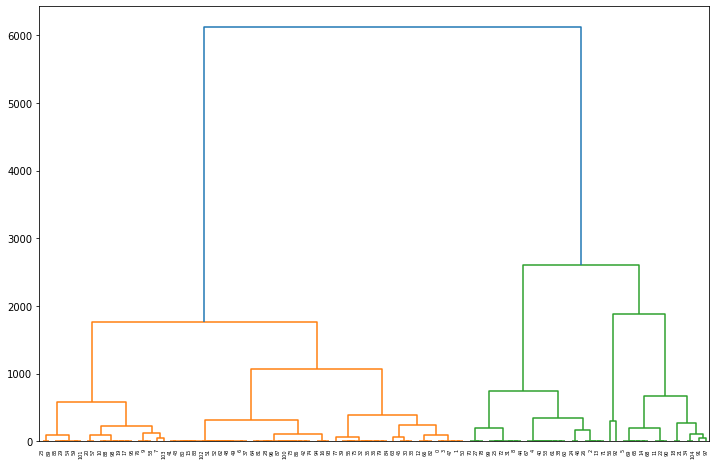

In [ ]:
#Creating dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(heirarch_df.iloc[:,1:], method='ward'))

Here we split at 1000 euclidean distance we get 6 clusters as we cut through 6 vertical lines

In [ ]:
h = np.array(heirarch_df)

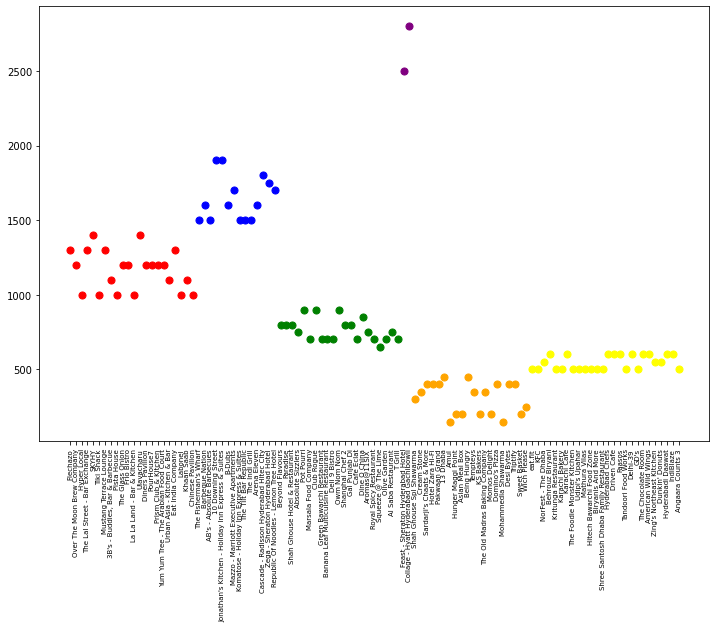

In [ ]:
#Scatter plot of 1st and second column for hierarchichal clustering
plt.scatter(h[labels==0, 0], h[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(h[labels==1, 0], h[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(h[labels==2, 0], h[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(h[labels==3, 0], h[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(h[labels==4, 0], h[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(h[labels==5, 0], h[labels==5, 1], s=50, marker='o', color='yellow')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

We can  see that the cluster distribution is similar to that of k means clustering with 6 clusters.

# **Sentiment Analysis**

In [ ]:
#To view entire text
pd.set_option('display.max_colwidth', None)

In [ ]:
sentiment_df=review_new_df[['Review','Rating']]
sentiment_df.head()

,Review,Rating
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0


In [ ]:
#removing urls from dataset
sentiment_df['cleaned_Review'] = sentiment_df['Review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')

In [ ]:
# for checking changes
sentiment_df.head()

,Review,Rating,cleaned_Review
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful."
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again."
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.


In [ ]:
import re
# remove special characters, numbers, punctuations
sentiment_df['cleaned_Review'] = sentiment_df['cleaned_Review'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [ ]:
# for checking changes after removing special characters, punctuations
sentiment_df.head()

,Review,Rating,cleaned_Review
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,The ambience was good food was quite good had Saturday lunch which was cost effective Good place for a sate brunch One can also chill with friends and or parents Waiter Soumen Das was really courteous and helpful
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience is too good for a pleasant evening Service is very prompt Food is good Over all a good experience Soumen Das kudos to the service
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,A must try great food great ambience Thnx for the service by Pradeep and Subroto My personal recommendation is Penne Alfredo Pasta Also the music in the background is amazing
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das and Arun was a great guy Only because of their behavior and sincerety And good food off course I would like to visit this place again
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food is good we ordered Kodi drumsticks and basket mutton biryani All are good Thanks to Pradeep He served well We enjoyed here Ambience is also very good


In [ ]:
# to consider only words with length greater than or equal to 3 
sentiment_df['cleaned_Review'] = sentiment_df['cleaned_Review'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >2]))

In [ ]:
#importing nltk library
import nltk
nltk.download('all')
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#words which we dont want to remove
imp_words=['not','no','nor','don',"don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
           "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",'isn',
           "isn't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
           'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't"]
           
#new stopword list
sw_nltk=[x for x in sw_nltk if x not in imp_words]

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw_nltk]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
#applying the functions
sentiment_df['cleaned_Review']=sentiment_df['cleaned_Review'].apply(stopwords)
sentiment_df.head()

,Review,Rating,cleaned_Review
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,ambience good pleasant evening service prompt food good good experience soumen das kudos service
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,soumen das arun great guy behavior sincerety good food course would like visit place
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good


In [ ]:
#creating a function to remove the emoji patterns
def remove_emojis(text):
    '''It remove emoji patterns from the given string.
    '''
    
    emojis = re.compile(
                        "["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags 
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags = re.UNICODE 
                      ) 
    
    return emojis.sub(r'', text)

In [ ]:
#applying emoji removing function
sentiment_df['cleaned_Review']=sentiment_df['cleaned_Review'].apply(remove_emojis)

In [ ]:
# To check all the words present in the cleaned tweet  (for further cleaning)
all_words = ' '.join([text for text in sentiment_df['cleaned_Review']])
all_words

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudos service must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing soumen das arun great guy behavior sincerety good food course would like visit place food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good ambiance good service good food apradeecp subro best service food good papiya good hostess caption good star restaurant nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place well reading many reviews finally visited place ambience good coming food crispy corn nice tawa fish basket biryani disappointed biryani not flattering claimed staff pol

It seems only stemming and lemmatisation is needed to further reduce the complexity of the data

 **Word Cloud**

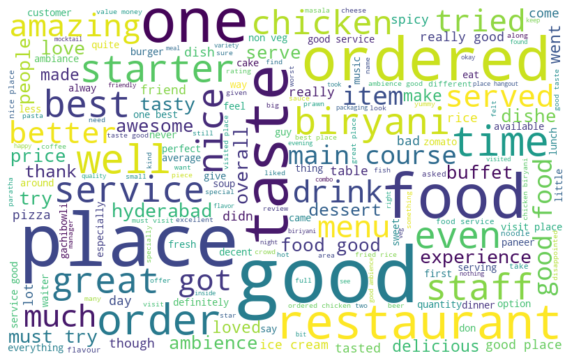

In [ ]:
# create text from all tweets
from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#For sentiment analysis creating polarity and subjectivity
from textblob import TextBlob
#creating column for polarity and subjectivity of review
sentiment_df['polarity'] = sentiment_df['cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity).round(2)
sentiment_df['subjectivity'] = sentiment_df['cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity).round(2)

In [ ]:
#creating a binary column of 'good_reviews'
sentiment_df["good_reviews"] = sentiment_df["Rating"].apply(lambda score: 1 if score >=3 else 0)

**Distribution of polarity and subjectivity**

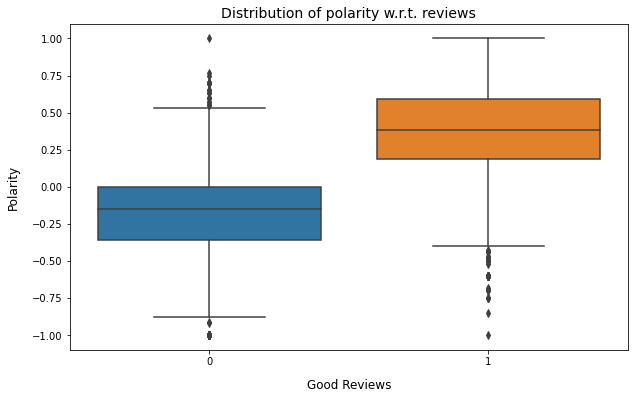

In [ ]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of polarity score
sns.boxplot(x = 'good_reviews', y = 'polarity', data = sentiment_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('Polarity', labelpad = 12, fontsize = 12)
plt.title('Distribution of polarity w.r.t. reviews', fontsize=14)
plt.show()

we can observe that there are bad reviews with high polarity and good reviews with low polarity

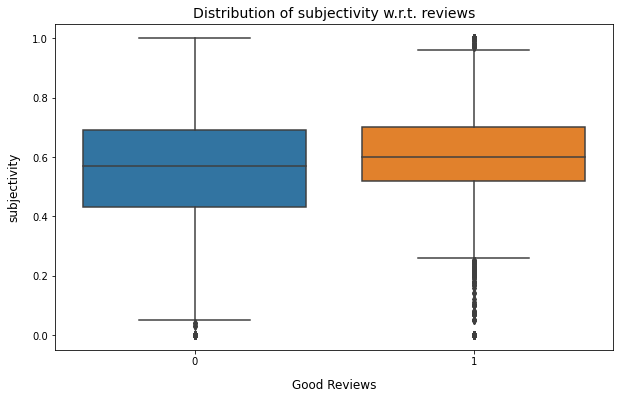

In [ ]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of polarity score
sns.boxplot(x = 'good_reviews', y = 'subjectivity', data = sentiment_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('subjectivity', labelpad = 12, fontsize = 12)
plt.title('Distribution of subjectivity w.r.t. reviews', fontsize=14)
plt.show()

we can observe that the median of good reviews is higher than the median of bad reviews for subjectivity.

In [ ]:
#creating a function to get lexical categories of the part of speech tag
def get_pos(tag):
    '''Takes the part of speech tag in string format and return 
       its lexical categories.
    '''    
    
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
        return wordnet.NOUN

    elif tag.startswith('R'):
        return wordnet.ADV

    else:
        return wordnet.NOUN

In [ ]:
#creating base lemmatizer object
lemmatizer = WordNetLemmatizer()

#creating a function to get lemmatized text
def lemmatized_words(text):
    '''Takes the text in string format and return lemmatized text.
    '''
    
    final_text = []
    for word in text.split():
        if word not in sw_nltk:
            pos = pos_tag([word])
            word = lemmatizer.lemmatize(word, get_pos(pos[0][1]))
            final_text.append(word)
            
    return " ".join(final_text)

In [ ]:
#applying lemmatized_words function on review column
sentiment_df['cleaned_Review'] = sentiment_df['cleaned_Review'].apply(lemmatized_words)

In [ ]:
#checking after lemmatisation
sentiment_df.head()

,Review,Rating,cleaned_Review,polarity,subjectivity,good_reviews
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,0.66,0.72,1
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,ambience good pleasant even service prompt food good good experience soumen da kudos service,0.71,0.69,1
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amaze,0.55,0.68,1
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,soumen da arun great guy behavior sincerety good food course would like visit place,0.75,0.68,1
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,food good order kodi drumstick basket mutton biryani good thanks pradeep serve well enjoy ambience also good,0.56,0.54,1


In [ ]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [ ]:
#Function to add metrics each time any model is evaluated
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred,average='weighted'),
                  'PRECISION':precision_score(y_test, y_pred,average='weighted'),
                  'F1-SCORE':f1_score(y_test, y_pred,average='weighted'),
                  'ROC AUC SCORE':roc_auc_score(y_test,y_pred)}
                  ,ignore_index=True)
  return df

In [ ]:
#assign X as a independent variable and y as a dependent variable
X = sentiment_df['cleaned_Review']
y = sentiment_df['good_reviews']
#spliting dataset into training and testing 

In [ ]:
#importing required libriaries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [ ]:
#Applying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_vectorized=vectorizer.fit_transform(x_train)
test_vectorized=vectorizer.transform(x_test)

The best parameter is {'alpha': 1}
Training accuracy Score    : 0.9291813159216474
Testing accuracy Score : 0.9206428930185836
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       463
           1       0.96      0.94      0.95      1528

    accuracy                           0.92      1991
   macro avg       0.88      0.90      0.89      1991
weighted avg       0.92      0.92      0.92      1991



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

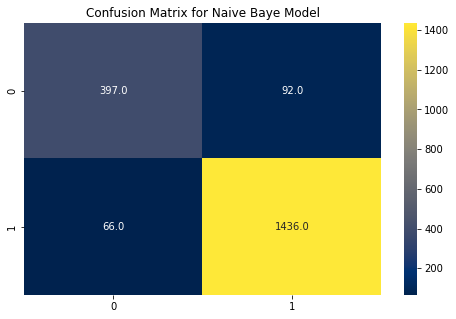

In [ ]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB
plt.figure(figsize=(8,5))
naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [ ]:
metrics_df = add_metrics_details("Naive_Baye(Multinomial)",y_test,NB_prediction,metrics_df)

**Logistic Regression**

In [ ]:
logr = LogisticRegression()
# hyperparameter tuning
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)
#prediction
y_pred = logreg.predict(test_vectorized)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

Training accuracy Score    : 0.9701155198392768
Testing accuracy Score : 0.9090909090909091
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       489
           1       0.93      0.95      0.94      1502

    accuracy                           0.91      1991
   macro avg       0.88      0.87      0.87      1991
weighted avg       0.91      0.91      0.91      1991



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

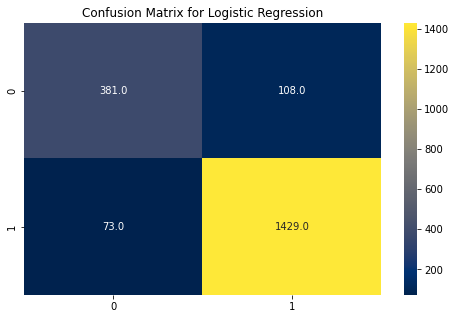

In [ ]:
plt.figure(figsize=(8,5))
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression")

In [ ]:
metrics_df = add_metrics_details("Logistic_Regression",y_test,y_pred,metrics_df)

**Random Forest**

In [ ]:
classifier = RandomForestClassifier()
#hyperparameter tuning
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[80, 90, 100, 110]}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,verbose=2)
#fitting data
rf.fit(train_vectorized, y_train)
#prediction
y_pred = rf.predict(test_vectorized)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................max_depth=80, n_estimators=100; total time=   7.3s
[CV] END .....................max_depth=80, n_estimators=100; total time=   7.0s
[CV] END .....................max_depth=80, n_estimators=100; total time=   8.8s
[CV] END .....................max_depth=80, n_estimators=100; total time=   6.8s
[CV] END .....................max_depth=80, n_estimators=100; total time=  10.1s
[CV] END .....................max_depth=80, n_estimators=200; total time=  15.8s
[CV] END .....................max_depth=80, n_estimators=200; total time=  19.4s
[CV] END .....................max_depth=80, n_estimators=200; total time=  13.0s
[CV] END .....................max_depth=80, n_estimators=200; total time=  13.9s
[CV] END .....................max_depth=80, n_estimators=200; total time=  19.7s
[CV] END .....................max_depth=80, n_estimators=300; total time=  19.2s
[CV] END .....................max_depth=80, n_es

Training accuracy Score    : 0.9890758412857861
Testing accuracy Score : 0.9075841285786037
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       489
           1       0.91      0.97      0.94      1502

    accuracy                           0.91      1991
   macro avg       0.90      0.84      0.87      1991
weighted avg       0.91      0.91      0.90      1991



Text(0.5, 1.0, 'Confusion Matrix for RandomForest')

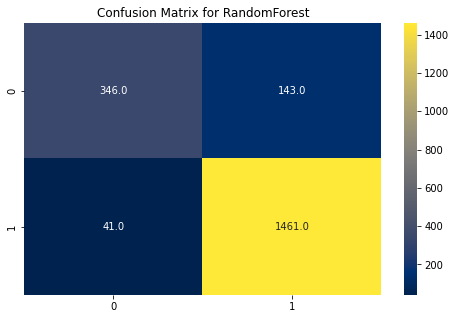

In [ ]:
plt.figure(figsize=(8,5))
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for RandomForest")

In [ ]:
metrics_df = add_metrics_details("Random Forest-CountVectorizer",y_test,y_pred,metrics_df)

**XG Boost**

In [ ]:
#importing the libraries
from xgboost import XGBClassifier
xg_boost = XGBClassifier()
#fitting data
xg_boost.fit(train_vectorized, y_train)
y_pred = xg_boost.predict(test_vectorized)

Training accuracy Score    : 0.9890758412857861
Testing accuracy Score : 0.8824711200401808
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       489
           1       0.89      0.96      0.93      1502

    accuracy                           0.88      1991
   macro avg       0.87      0.80      0.82      1991
weighted avg       0.88      0.88      0.88      1991



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

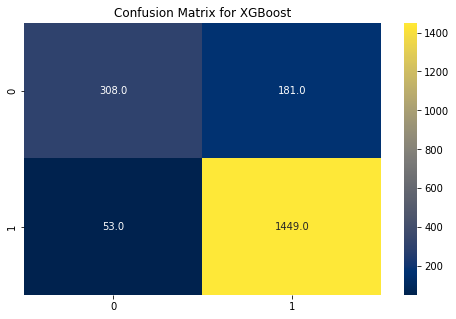

In [ ]:
plt.figure(figsize=(8,5))
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for XGBoost")

In [ ]:
metrics_df = add_metrics_details("XG Boost",y_test,y_pred,metrics_df)

In [ ]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,Naive_Baye(Multinomial),0.920643,0.920643,0.919568,0.919900,0.883960
1,Logistic_Regression,0.909091,0.909091,0.907500,0.907927,0.865270
2,Random Forest-CountVectorizer,0.907584,0.907584,0.906724,0.903721,0.840135
3,XG Boost,0.882471,0.882471,0.880171,0.876023,0.797285


# **CONCLUSION**

* The clustering is done and the restaurants are divided in to 5 different  clusters or groups

*   Sometimes people give good rating even when their reviews are bad or negative
*   The Naive Bayes  gives the best model for sentimental analysis for the given dataset.

* The Naive Bayes model gives an accuracy,precision, recall score of 0.92 and an ROC AUC score of 0.88